<a href="https://colab.research.google.com/github/ManishEnishetty97/DeepLearning-HW1/blob/main/Deep_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import torch
import math
import numpy as np
import matplotlib as plt
import torchvision
import torch.nn as nn
import torch.nn.functional as F

In [7]:
X=torch.linspace(0,3,300)
Y=torch.sin(5*math.pi*X)
target=Y[:]

**Deep Model**
A Neural Network which has 3 or more than 3 hidden layers is called Deep Neural Network.

In [29]:
class Fun3(nn.Module):
  def __init__(self,X):
    super(Fun3,self).__init__()
    self.fc1=nn.Linear(300,1)
    self.fc2=nn.Linear(1,45)
    self.fc3=nn.Linear(45,95)
    self.fc4=nn.Linear(95,115)
    self.fc5=nn.Linear(115,300)

  def forward(self,X):
    out=self.fc1(X)
    out=F.relu(self.fc2(out))
    out=F.relu(self.fc3(out))
    out=F.relu(self.fc4(out))
    out=self.fc5(out)
    return out
    
  model=Fun3(X)

print(model)

Fun3(
  (fc1): Linear(in_features=300, out_features=1, bias=True)
  (fc2): Linear(in_features=1, out_features=45, bias=True)
  (fc3): Linear(in_features=45, out_features=95, bias=True)
  (fc4): Linear(in_features=95, out_features=115, bias=True)
  (fc5): Linear(in_features=115, out_features=300, bias=True)
)


In [30]:
pytorch_total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(pytorch_total_params)

50601


In [39]:
criterion=nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.005)
loss_list=[]
final=torch.tensor(0)
Epochs=10
for epoch in range(Epochs):
  running_loss=0.0
  for i in range(300):
    optimizer.zero_grad()
    outputs=model(X)
    loss=criterion(outputs,target)
    running_loss+=loss.item()
    loss_list.append(running_loss)
    loss.backward()
    optimizer.step()
  print('[%d, %5d] loss: %.8f' %(epoch + 1, i, running_loss ))
  final=(outputs.flatten())


[1,   299] loss: 0.00000000
[2,   299] loss: 0.00000000
[3,   299] loss: 0.00000000
[4,   299] loss: 0.00000000
[5,   299] loss: 0.00000000
[6,   299] loss: 0.00000000
[7,   299] loss: 0.00000000
[8,   299] loss: 0.00000000
[9,   299] loss: 0.00000000
[10,   299] loss: 0.00000000


After Training of the network for multiple times, we have reached very less loss which means our model is working as expected.so Let us see how our model loss

Text(0.5, 1.0, 'ModelLoss3')

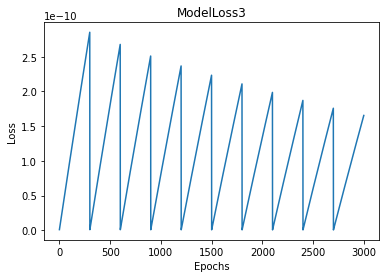

In [41]:
import matplotlib.pyplot as plt
plt.plot(loss_list)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('ModelLoss3')

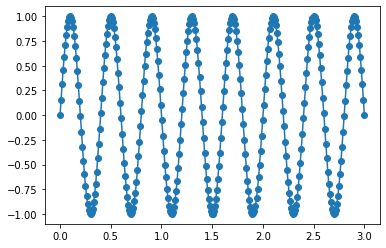

In [35]:
plt.plot(X,Y)
graph2=final
final_model=graph2.detach()
plt.scatter(X,final_model)
